<a href="https://colab.research.google.com/github/dikshank/Electricity-Load-Forcast/blob/main/Electricity_Load_Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!mkdir NLP_PROJECTS

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
cd '/content/drive/MyDrive/NLP_PROJECTS'

/content/drive/MyDrive/NLP_PROJECTS


In [ ]:
!mkdir Electricity_Load_Forcast

In [ ]:
pwd

'/content/drive/MyDrive/NLP_PROJECTS'

In [ ]:
cd '/content/drive/MyDrive/NLP_PROJECTS/Electricity_Load_Forcast'

/content/drive/MyDrive/NLP_PROJECTS/Electricity_Load_Forcast


In [ ]:
!git clone https://github.com/aimlrl/Electricity-Load-Forecasting.git

Cloning into 'Electricity-Load-Forecasting'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 1), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NLP_PROJECTS/Electricity_Load_Forcast/Electricity-Load-Forecasting/assignment-data.csv')

In [ ]:
data.head()

,Unnamed: 0,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01
1,1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01
2,2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01
3,3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01
4,4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01


In [ ]:
data.shape

(103392, 10)

In [ ]:
#method 1 of comparing two pandas columns 
data['apparent_temperature'].equals(data['temperature'])

False

In [ ]:
#method 2 of comparing two pandas columns 
df = np.where((data['apparent_temperature'] != data['temperature']))

In [ ]:
len(df[0])

51828

In [ ]:
51564+51828

103392

In [ ]:
data.tail()

,Unnamed: 0,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
103387,103387,2020-12-12 22:45:00,858.50,17.79750,17.79750,0.756000,12.4005,1.950375,0.16275,2020-12-12
103388,103388,2020-12-12 23:00:00,832.24,17.66100,17.66100,0.756000,12.2640,2.047500,0.14700,2020-12-12
103389,103389,2020-12-12 23:15:00,804.97,17.46675,17.46675,0.758625,12.1275,2.144625,0.11550,2020-12-12
103390,103390,2020-12-12 23:30:00,763.56,17.27250,17.27250,0.761250,11.9910,2.241750,0.08400,2020-12-12
103391,103391,2020-12-12 23:45:00,734.27,17.07825,17.07825,0.763875,11.8545,2.338875,0.05250,2020-12-12


In [ ]:
#dropping unnecessary columns 
data.drop(['Unnamed: 0', 'date'], axis = 1, inplace  = True)

In [ ]:
data.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0


In [ ]:
#method 3 of comparing two pandas columns
data[data['apparent_temperature']!=data['temperature']]

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover
13,2018-01-01 03:15:00,643.02357,8.732062,8.79375,1.026375,8.411812,0.175875,0.000000
14,2018-01-01 03:30:00,641.13083,8.581125,8.70450,1.023750,8.287125,0.351750,0.000000
15,2018-01-01 03:45:00,651.47020,8.430188,8.61525,1.021125,8.162437,0.527625,0.000000
16,2018-01-01 04:00:00,646.83632,8.279250,8.52600,1.018500,8.037750,0.703500,0.000000
17,2018-01-01 04:15:00,656.34850,8.128312,8.43675,1.015875,7.913062,0.879375,0.000000
...,...,...,...,...,...,...,...,...
103347,2020-12-12 12:45:00,1352.58190,23.210250,23.21550,0.682500,15.894375,1.501500,0.742875
103348,2020-12-12 13:00:00,1262.98480,23.562000,23.57250,0.661500,15.760500,1.575000,0.745500
103349,2020-12-12 13:15:00,1253.60190,23.827125,23.83500,0.645750,15.613500,1.656375,0.724500
103350,2020-12-12 13:30:00,1242.38080,24.092250,24.09750,0.630000,15.466500,1.737750,0.703500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103392 entries, 0 to 103391
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              103392 non-null  object 
 1   load                  101952 non-null  float64
 2   apparent_temperature  103392 non-null  float64
 3   temperature           103392 non-null  float64
 4   humidity              103392 non-null  float64
 5   dew_point             103392 non-null  float64
 6   wind_speed            103392 non-null  float64
 7   cloud_cover           103392 non-null  float64
dtypes: float64(7), object(1)
memory usage: 6.3+ MB


In [ ]:
data['load'] = data['load'].interpolate()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103392 entries, 0 to 103391
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              103392 non-null  object 
 1   load                  103392 non-null  float64
 2   apparent_temperature  103392 non-null  float64
 3   temperature           103392 non-null  float64
 4   humidity              103392 non-null  float64
 5   dew_point             103392 non-null  float64
 6   wind_speed            103392 non-null  float64
 7   cloud_cover           103392 non-null  float64
dtypes: float64(7), object(1)
memory usage: 6.3+ MB


In [ ]:
# why we convert the datetime column to datetime object
train_date = pd.to_datetime(data['datetime'])

In [ ]:
train_date

0        2018-01-01 00:00:00
1        2018-01-01 00:15:00
2        2018-01-01 00:30:00
3        2018-01-01 00:45:00
4        2018-01-01 01:00:00
                 ...        
103387   2020-12-12 22:45:00
103388   2020-12-12 23:00:00
103389   2020-12-12 23:15:00
103390   2020-12-12 23:30:00
103391   2020-12-12 23:45:00
Name: datetime, Length: 103392, dtype: datetime64[ns]

In [ ]:
# Let's seperate all the feature columns as well as the ground truth label column from the dataset

cols = list(data)[1:8]    # we exclude the last number in [ ] this for example [1:4] is 1,2,3 and not 1,2,3,4

In [ ]:
cols

['load',
 'apparent_temperature',
 'temperature',
 'humidity',
 'dew_point',
 'wind_speed',
 'cloud_cover']

In [ ]:
df_for_training = data[cols].astype(float)

In [ ]:
df_for_training.info()   # why did we change the datatype twice?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103392 entries, 0 to 103391
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   load                  103392 non-null  float64
 1   apparent_temperature  103392 non-null  float64
 2   temperature           103392 non-null  float64
 3   humidity              103392 non-null  float64
 4   dew_point             103392 non-null  float64
 5   wind_speed            103392 non-null  float64
 6   cloud_cover           103392 non-null  float64
dtypes: float64(7)
memory usage: 5.5 MB


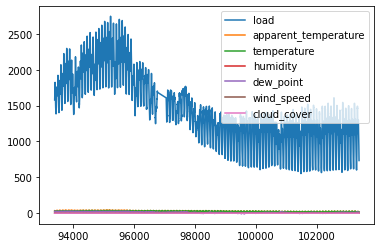

In [ ]:
df_for_plot = df_for_training.tail(10000)
df_for_plot.plot.line()

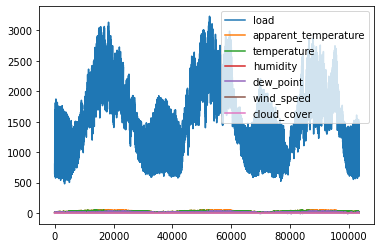

In [ ]:
df_for_training.plot.line()

# Data Preprocessing

In [ ]:
# Now, what we are doing to do is that, we are going to normalize our data so that the gradient converges faster in the backpropagation 
# while training the LSTM network, using this data

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

# Let's prepare the training data

In [ ]:
training_features = []
training_labels = []

In [ ]:
n_future = 1 #How many values are to be predicted in future 
n_past = 14 # How many past time steps values are to be taken into consideration to predict the future value. 

In [ ]:
for i in range(n_past, 30 - n_future + 1):
  print(i)
  # if i>20:
  #   break

14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
df_for_training_scaled.shape[1]

7

In [ ]:
df_for_training_scaled[14,0]

-1.7316048995258948

In [ ]:
# 14-14:14 0:14
# 13:14
df_for_training_scaled[14:14, 0]

array([], dtype=float64)

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
n_past = 5
n_future = 2
for i in range(n_past,len(a)-n_future+1):
  print(f'i : {i}')
  print(f'feature_index: {i - n_past}:{i}')
  print(f'label_index: {i}:{i +n_future}')

i : 5
feature_index: 0:5
label_index: 5:7
i : 6
feature_index: 1:6
label_index: 6:8
i : 7
feature_index: 2:7
label_index: 7:9
i : 8
feature_index: 3:8
label_index: 8:10
i : 9
feature_index: 4:9
label_index: 9:11
i : 10
feature_index: 5:10
label_index: 10:12
i : 11
feature_index: 6:11
label_index: 11:13
i : 12
feature_index: 7:12
label_index: 12:14
i : 13
feature_index: 8:13
label_index: 13:15
i : 14
feature_index: 9:14
label_index: 14:16


In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    
    training_features.append(df_for_training_scaled[i - n_past:i,
                                           0:df_for_training_scaled.shape[1]])
    training_labels.append(df_for_training_scaled[i + n_future - 1:i +n_future, 0]) # i don't get it for example if we have to predict 2 values we still would get only one label

In [ ]:
training_features, training_labels = np.array(training_features), np.array(training_labels)

In [ ]:
training_features.shape

(103378, 14, 7)

In [ ]:
training_labels.shape

(103378, 1)

In [ ]:
training_features.shape[2]

7

# LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(
    128, 
    activation = 'relu',
    input_shape = (training_features.shape[1], training_features.shape[2]),
    return_sequences = True
))
model.add(LSTM(
    64, 
    activation = 'relu',
    return_sequences = False
))
model.add(Dropout(0.5))
model.add(Dense(training_labels.shape[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           69632     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 119,105
Trainable params: 119,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

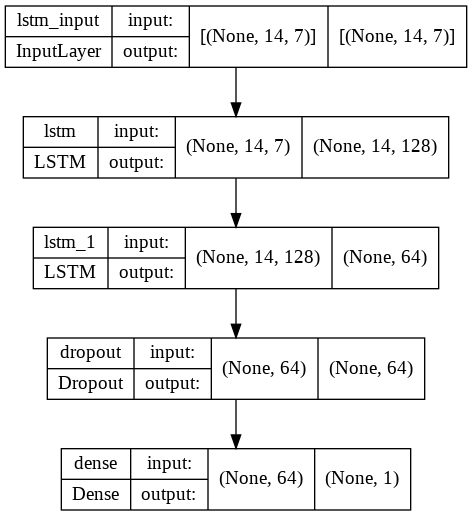

In [ ]:
tf.keras.utils.plot_model(model=model,show_shapes=True)

In [ ]:
model.compile(
    loss = 'mse',
    optimizer = 'adam'
)

In [ ]:
history = model.fit(
    training_features,
    training_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.3,
    verbose =1,
    shuffle = False 
)

Epoch 1/10
566/566 [==============================] - 43s 72ms/step - loss: 0.1178 - val_loss: 0.0796
Epoch 2/10
566/566 [==============================] - 37s 66ms/step - loss: 0.0558 - val_loss: 0.0375
Epoch 3/10
566/566 [==============================] - 39s 69ms/step - loss: 0.0497 - val_loss: 0.0414
Epoch 4/10
566/566 [==============================] - 37s 66ms/step - loss: 0.0470 - val_loss: 0.0230
Epoch 5/10
566/566 [==============================] - 38s 66ms/step - loss: 0.0458 - val_loss: 0.0164
Epoch 6/10
566/566 [==============================] - 39s 70ms/step - loss: 0.0461 - val_loss: 0.0181
Epoch 7/10
566/566 [==============================] - 38s 66ms/step - loss: 0.0454 - val_loss: 0.0164
Epoch 8/10
566/566 [==============================] - 38s 66ms/step - loss: 0.0452 - val_loss: 0.0168
Epoch 9/10
566/566 [==============================] - 39s 70ms/step - loss: 0.0454 - val_loss: 0.0074
Epoch 10/10
566/566 [==============================] - 38s 66ms/step - loss: 0.045

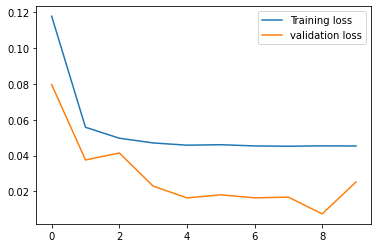

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

In [ ]:
n_future = 194 # We will be trying to predict the future 194 values through our model. 
train_date

0        2018-01-01 00:00:00
1        2018-01-01 00:15:00
2        2018-01-01 00:30:00
3        2018-01-01 00:45:00
4        2018-01-01 01:00:00
                 ...        
103387   2020-12-12 22:45:00
103388   2020-12-12 23:00:00
103389   2020-12-12 23:15:00
103390   2020-12-12 23:30:00
103391   2020-12-12 23:45:00
Name: datetime, Length: 103392, dtype: datetime64[ns]

In [ ]:
# This is going to be the forecasting datetime period for which want to predict the values in future using our trained model.
forecast_period_dates = pd.date_range(
    list(train_date)[-1],
    periods = n_future,
    freq = "15min"
).tolist()

In [ ]:
forecast_period_dates[1:]

[Timestamp('2020-12-13 00:00:00', freq='15T'),
 Timestamp('2020-12-13 00:15:00', freq='15T'),
 Timestamp('2020-12-13 00:30:00', freq='15T'),
 Timestamp('2020-12-13 00:45:00', freq='15T'),
 Timestamp('2020-12-13 01:00:00', freq='15T'),
 Timestamp('2020-12-13 01:15:00', freq='15T'),
 Timestamp('2020-12-13 01:30:00', freq='15T'),
 Timestamp('2020-12-13 01:45:00', freq='15T'),
 Timestamp('2020-12-13 02:00:00', freq='15T'),
 Timestamp('2020-12-13 02:15:00', freq='15T'),
 Timestamp('2020-12-13 02:30:00', freq='15T'),
 Timestamp('2020-12-13 02:45:00', freq='15T'),
 Timestamp('2020-12-13 03:00:00', freq='15T'),
 Timestamp('2020-12-13 03:15:00', freq='15T'),
 Timestamp('2020-12-13 03:30:00', freq='15T'),
 Timestamp('2020-12-13 03:45:00', freq='15T'),
 Timestamp('2020-12-13 04:00:00', freq='15T'),
 Timestamp('2020-12-13 04:15:00', freq='15T'),
 Timestamp('2020-12-13 04:30:00', freq='15T'),
 Timestamp('2020-12-13 04:45:00', freq='15T'),
 Timestamp('2020-12-13 05:00:00', freq='15T'),
 Timestamp('2

In [ ]:
len(forecast_period_dates)

194

In [ ]:
a = [1,2,3,4,5,6]
f = a[-3:]
print(f)

[4, 5, 6]


In [ ]:
# Let's predict the values using our trained model
forecast = model.predict(training_features[-n_future:])

In [ ]:
forecast

array([[-1.2799437 ],
       [-1.3442392 ],
       [-1.3931675 ],
       [-1.5042214 ],
       [-1.5418186 ],
       [-1.5189688 ],
       [-1.5176382 ],
       [-1.5500126 ],
       [-1.5685148 ],
       [-1.5742977 ],
       [-1.5749991 ],
       [-1.594099  ],
       [-1.6120307 ],
       [-1.5975561 ],
       [-1.6045656 ],
       [-1.6078022 ],
       [-1.6001778 ],
       [-1.596972  ],
       [-1.5870152 ],
       [-1.5639639 ],
       [-1.5352182 ],
       [-1.4870007 ],
       [-1.4392023 ],
       [-1.3652291 ],
       [-1.2839854 ],
       [-1.1966596 ],
       [-1.1092954 ],
       [-0.9646966 ],
       [-0.8395514 ],
       [-0.76866335],
       [-0.71118635],
       [-0.5995547 ],
       [-0.4342578 ],
       [-0.32114473],
       [-0.2623946 ],
       [-0.22218087],
       [-0.18395072],
       [-0.17705163],
       [-0.20271862],
       [-0.1656838 ],
       [-0.15418664],
       [-0.12915337],
       [-0.06978518],
       [-0.06698038],
       [-0.05272606],
       [-0

In [ ]:
len(forecast)

194

In [ ]:
forecast_copy = np.repeat(
    forecast,
    df_for_training.shape[1],
    axis = 1
)

In [ ]:
# Here, we will be applying inverse transformation to our forecasted values to get the unnormalized predictions. 
y_pred_future = scaler.inverse_transform(forecast_copy)[:,0]

In [ ]:
y_pred_future.shape

(194,)

In [ ]:
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.timestamp())

In [ ]:
forecast_dates = pd.to_datetime(forecast_dates, unit = 's')

In [ ]:
forecast_dates

DatetimeIndex(['2020-12-12 23:45:00', '2020-12-13 00:00:00',
               '2020-12-13 00:15:00', '2020-12-13 00:30:00',
               '2020-12-13 00:45:00', '2020-12-13 01:00:00',
               '2020-12-13 01:15:00', '2020-12-13 01:30:00',
               '2020-12-13 01:45:00', '2020-12-13 02:00:00',
               ...
               '2020-12-14 21:45:00', '2020-12-14 22:00:00',
               '2020-12-14 22:15:00', '2020-12-14 22:30:00',
               '2020-12-14 22:45:00', '2020-12-14 23:00:00',
               '2020-12-14 23:15:00', '2020-12-14 23:30:00',
               '2020-12-14 23:45:00', '2020-12-15 00:00:00'],
              dtype='datetime64[ns]', length=194, freq=None)

In [ ]:
forecast_dates = np.array(forecast_dates)
forecast_dates.shape

(194,)

In [ ]:
y_pred_future.shape

(194,)